# Parsing prices for the 1st price zone of day-ahead market

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
class ElectricityHourPrice:
    def __init__(self, 
                 date, 
                 price_zone_code, 
                 consumer_volume, 
                 consumer_price, 
                 consumer_rd_volume,
                 consumer_spot_volume,
                 consumer_provide_rd,
                 consumer_max_price,
                 consumer_min_price,
                 supplier_volume,
                 supplier_price,
                 supplier_rd_volume,
                 supplier_spot_volume,
                 supplier_provide_rd,
                 supplier_max_price,
                 supplier_min_price,
                 hour):
        self.date = date
        self.price_zone_code = price_zone_code
        self.consumer_volume = consumer_volume
        self.consumer_price = consumer_price
        self.consumer_rd_volume = consumer_rd_volume
        self.consumer_spot_volume = consumer_spot_volume
        self.consumer_provide_rd = consumer_provide_rd
        self.consumer_max_price = consumer_max_price
        self.consumer_min_price = consumer_min_price
        self.supplier_volume = supplier_volume
        self.supplier_price = supplier_price
        self.supplier_rd_volume = supplier_rd_volume
        self.supplier_spot_volume = supplier_spot_volume
        self.supplier_provide_rd = supplier_provide_rd
        self.supplier_max_price = supplier_max_price
        self.supplier_min_price = supplier_min_price
        self.hour = hour

In [3]:
import requests
import xmltodict
from operator import itemgetter

def get_prices_by_date(date, zone = '2'):
    f_date = date.strftime('%Y%m%d')
    url = f'https://www.atsenergo.ru/market/stats.xml?period=0&date1={f_date}&date2={f_date}&zone={zone}&type=graph'
    response = requests.get(url, verify = False) #verify = False --> self-signed cert
    content = response.content
    result = xmltodict.parse(content)
    rows = list(map(itemgetter('col'), result['view']['row']))
    return rows

In [4]:
import datetime

start_date = datetime.datetime(2019, 5, 27)
end_date = datetime.datetime(2024, 5, 27)

print(f'Start date: {start_date.strftime("%Y-%m-%d")}')
print(f'End date: {end_date.strftime("%Y-%m-%d")}')
print(f'Time period: {str(end_date - start_date)}')

Start date: 2019-05-27
End date: 2024-05-27
Time period: 1827 days, 0:00:00


In [5]:
import warnings
warnings.filterwarnings("ignore")

electricity_hour_prices = []
cur_date = start_date
print(f"Starting getting prices for {start_date.strftime('%Y-%m-%d')}")
while cur_date <= end_date:
    if (cur_date.day % 7 == 0):
        print(f"Getting prices for {cur_date.strftime('%Y-%m-%d')}")
    try:
        price_rows = get_prices_by_date(cur_date, zone = '1')
        for price_row in price_rows:
            electricity_hour_prices.append(ElectricityHourPrice(*price_row))
    except Exception as e:
        print(f"Can't get the price data for {cur_date.strftime('%Y-%m-%d')}")
        print(f"Reason: {e}")
    finally:
        cur_date += datetime.timedelta(days = 1)
print(f"Finished getting prices for {end_date.strftime('%Y-%m-%d')}")

Starting getting prices for 2019-05-27
Getting prices for 2019-05-28
Getting prices for 2019-06-07
Getting prices for 2019-06-14
Getting prices for 2019-06-21
Getting prices for 2019-06-28
Getting prices for 2019-07-07
Getting prices for 2019-07-14
Getting prices for 2019-07-21
Getting prices for 2019-07-28
Getting prices for 2019-08-07
Getting prices for 2019-08-14
Getting prices for 2019-08-21
Getting prices for 2019-08-28
Getting prices for 2019-09-07
Getting prices for 2019-09-14
Getting prices for 2019-09-21
Getting prices for 2019-09-28
Getting prices for 2019-10-07
Getting prices for 2019-10-14
Getting prices for 2019-10-21
Getting prices for 2019-10-28
Getting prices for 2019-11-07
Getting prices for 2019-11-14
Getting prices for 2019-11-21
Getting prices for 2019-11-28
Getting prices for 2019-12-07
Getting prices for 2019-12-14
Getting prices for 2019-12-21
Getting prices for 2019-12-28
Getting prices for 2020-01-07
Getting prices for 2020-01-14
Getting prices for 2020-01-21
G

In [6]:
df = pd.DataFrame([vars(price_row) for price_row in electricity_hour_prices])
df

,date,price_zone_code,consumer_volume,consumer_price,consumer_rd_volume,consumer_spot_volume,consumer_provide_rd,consumer_max_price,consumer_min_price,supplier_volume,supplier_price,supplier_rd_volume,supplier_spot_volume,supplier_provide_rd,supplier_max_price,supplier_min_price,hour
0,27.05.2019,1,72688.769,1187.9,6464.096,61398.866,136.477,1501.85,0,75268.731,1128.21,6464.096,63363.45,530.573,1519.99,0,0
1,27.05.2019,1,71304.509,1084.85,6464.096,60028.024,175.006,1264.89,0,73867.885,1033.18,6464.096,61964.004,531.714,1251.19,0,1
2,27.05.2019,1,70337.56,1019.88,6464.096,59058.392,199.643,1193.75,0,72871.978,974.15,6464.096,60961.493,524.048,1163.38,0,2
3,27.05.2019,1,69922.705,1005.77,6464.096,58695.794,248.555,1186.88,0,72418.066,961.04,6464.096,60524.871,529.137,1145.58,0,3
4,27.05.2019,1,70378.546,1033.82,6464.096,59231.689,320.517,1213,0,72916.065,990.31,6464.096,61028.726,525.048,1213.1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43867,27.05.2024,1,87534.483,1740.33,33189.033,48513.967,218.830,2056.55,783.70,90189.599,1661.53,33189.033,54939.261,4908.237,6356.46,783.70,19
43868,27.05.2024,1,87971.873,1734.78,33189.033,48897.751,144.910,2330.79,0.00,90707.492,1639.18,33189.033,55421.227,4875.640,6356.46,0.00,20
43869,27.05.2024,1,86935.178,1661.71,33189.033,48073.102,180.487,2187.83,1.52,89622.639,1570.74,33189.033,54571.375,4933.962,6356.46,1.52,21
43870,27.05.2024,1,83327.276,1413.06,33189.033,44603.562,366.901,1775.00,917.75,85847.879,1348.54,33189.033,50904.556,5013.003,6356.46,917.75,22


# Formatting dataset

In [7]:
df_form = df.copy()

In [8]:
df_form[df.columns[1:-1]] = df_form[df.columns[1:-1]].astype(float)
df_form['hour'] = df_form['hour'].astype(int)
df_form['price_zone_code'] = df_form['price_zone_code'].astype(int)

In [9]:
dates_from_table = df_form['date']
hours_from_table = df_form['hour']

In [10]:
from datetime import datetime

dates = [datetime.strptime(i, '%d.%m.%Y') for i in dates_from_table]
dates = [item[0].replace(hour = item[1]) for item in zip(dates, hours_from_table)]

In [11]:
df_form.drop(columns = ['date', 'hour'], inplace = True)
df_form['date'] = dates
df_form['date'] = pd.to_datetime(df_form['date'], utc = True)
df_form = df_form.set_index('date')
df_form = df_form.asfreq('1H')
df_form.sort_index(inplace = True)
df_form

,price_zone_code,consumer_volume,consumer_price,consumer_rd_volume,consumer_spot_volume,consumer_provide_rd,consumer_max_price,consumer_min_price,supplier_volume,supplier_price,supplier_rd_volume,supplier_spot_volume,supplier_provide_rd,supplier_max_price,supplier_min_price
date,,,,,,,,,,,,,,,
2019-05-27 00:00:00+00:00,1,72688.769,1187.90,6464.096,61398.866,136.477,1501.85,0.00,75268.731,1128.21,6464.096,63363.450,530.573,1519.99,0.00
2019-05-27 01:00:00+00:00,1,71304.509,1084.85,6464.096,60028.024,175.006,1264.89,0.00,73867.885,1033.18,6464.096,61964.004,531.714,1251.19,0.00
2019-05-27 02:00:00+00:00,1,70337.560,1019.88,6464.096,59058.392,199.643,1193.75,0.00,72871.978,974.15,6464.096,60961.493,524.048,1163.38,0.00
2019-05-27 03:00:00+00:00,1,69922.705,1005.77,6464.096,58695.794,248.555,1186.88,0.00,72418.066,961.04,6464.096,60524.871,529.137,1145.58,0.00
2019-05-27 04:00:00+00:00,1,70378.546,1033.82,6464.096,59231.689,320.517,1213.00,0.00,72916.065,990.31,6464.096,61028.726,525.048,1213.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27 19:00:00+00:00,1,87534.483,1740.33,33189.033,48513.967,218.830,2056.55,783.70,90189.599,1661.53,33189.033,54939.261,4908.237,6356.46,783.70
2024-05-27 20:00:00+00:00,1,87971.873,1734.78,33189.033,48897.751,144.910,2330.79,0.00,90707.492,1639.18,33189.033,55421.227,4875.640,6356.46,0.00
2024-05-27 21:00:00+00:00,1,86935.178,1661.71,33189.033,48073.102,180.487,2187.83,1.52,89622.639,1570.74,33189.033,54571.375,4933.962,6356.46,1.52


## Verifying the order of index

In [12]:
def verify_index(df):
    try:
        return (df.index == pd.date_range(start = df.index.min(), end = df.index.max(), freq = df.index.freq)).all()
    except:
        print("Error: can't verify temporary index")
        return False

verify_index(df_form)

True

## Saving

In [13]:
df_form.to_csv('electricity_price_hourly_1_zone_formatted.csv', index = True)

# Feature engineering

In [14]:
df = df_form.copy()
#df = df[['consumer_price', 'supplier_price']]
df = df[['supplier_price']]
df

,supplier_price
date,
2019-05-27 00:00:00+00:00,1128.21
2019-05-27 01:00:00+00:00,1033.18
2019-05-27 02:00:00+00:00,974.15
2019-05-27 03:00:00+00:00,961.04
2019-05-27 04:00:00+00:00,990.31
...,...
2024-05-27 19:00:00+00:00,1661.53
2024-05-27 20:00:00+00:00,1639.18
2024-05-27 21:00:00+00:00,1570.74


In [15]:
def add_time_features(df):
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['week_of_year'] = pd.Index(df.index.isocalendar().week)
    df['week_of_year'] = df['week_of_year'].astype(int)
    df['day'] = df.index.day
    df['day_of_year'] = df.index.dayofyear
    df['day_of_week'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
add_time_features(df)
df

,supplier_price,year,quarter,month,week_of_year,day,day_of_year,day_of_week,hour
date,,,,,,,,,
2019-05-27 00:00:00+00:00,1128.21,2019,2,5,22,27,147,0,0
2019-05-27 01:00:00+00:00,1033.18,2019,2,5,22,27,147,0,1
2019-05-27 02:00:00+00:00,974.15,2019,2,5,22,27,147,0,2
2019-05-27 03:00:00+00:00,961.04,2019,2,5,22,27,147,0,3
2019-05-27 04:00:00+00:00,990.31,2019,2,5,22,27,147,0,4
...,...,...,...,...,...,...,...,...,...
2024-05-27 19:00:00+00:00,1661.53,2024,2,5,22,27,148,0,19
2024-05-27 20:00:00+00:00,1639.18,2024,2,5,22,27,148,0,20
2024-05-27 21:00:00+00:00,1570.74,2024,2,5,22,27,148,0,21


In [16]:
df = df[['year', 'quarter', 'month', 'week_of_year', 'day_of_year', 'day_of_week', 'day', 'hour', 'supplier_price']]
df

,year,quarter,month,week_of_year,day_of_year,day_of_week,day,hour,supplier_price
date,,,,,,,,,
2019-05-27 00:00:00+00:00,2019,2,5,22,147,0,27,0,1128.21
2019-05-27 01:00:00+00:00,2019,2,5,22,147,0,27,1,1033.18
2019-05-27 02:00:00+00:00,2019,2,5,22,147,0,27,2,974.15
2019-05-27 03:00:00+00:00,2019,2,5,22,147,0,27,3,961.04
2019-05-27 04:00:00+00:00,2019,2,5,22,147,0,27,4,990.31
...,...,...,...,...,...,...,...,...,...
2024-05-27 19:00:00+00:00,2024,2,5,22,148,0,27,19,1661.53
2024-05-27 20:00:00+00:00,2024,2,5,22,148,0,27,20,1639.18
2024-05-27 21:00:00+00:00,2024,2,5,22,148,0,27,21,1570.74


In [17]:
df.to_csv('electricity_price_hourly_1_zone_supplier.csv', index = True)

# Is there any correlation between supplier prices of 1st and 2nd price zones?

In [62]:
df_zone_1 = pd.read_csv('electricity_price_hourly_1_zone_supplier.csv', index_col = 'date')
#df_zone_1 = df_zone_1.asfreq('1H')
df_zone_2 = pd.read_csv('electricity_price_hourly_supplier_fix.csv', index_col = 'date')
#df_zone_2 = df_zone_2.asfreq('1H')

In [63]:
df_zone_1

,year,quarter,month,week_of_year,day_of_year,day_of_week,day,hour,supplier_price
date,,,,,,,,,
2019-05-27 00:00:00+00:00,2019,2,5,22,147,0,27,0,1128.21
2019-05-27 01:00:00+00:00,2019,2,5,22,147,0,27,1,1033.18
2019-05-27 02:00:00+00:00,2019,2,5,22,147,0,27,2,974.15
2019-05-27 03:00:00+00:00,2019,2,5,22,147,0,27,3,961.04
2019-05-27 04:00:00+00:00,2019,2,5,22,147,0,27,4,990.31
...,...,...,...,...,...,...,...,...,...
2024-05-27 19:00:00+00:00,2024,2,5,22,148,0,27,19,1661.53
2024-05-27 20:00:00+00:00,2024,2,5,22,148,0,27,20,1639.18
2024-05-27 21:00:00+00:00,2024,2,5,22,148,0,27,21,1570.74


In [20]:
df_zone_2

,year,quarter,month,week_of_year,day_of_year,day_of_week,day,hour,supplier_price
date,,,,,,,,,
2019-05-27 00:00:00+00:00,2019,2,5,22,147,0,27,0,949.90
2019-05-27 01:00:00+00:00,2019,2,5,22,147,0,27,1,942.20
2019-05-27 02:00:00+00:00,2019,2,5,22,147,0,27,2,952.14
2019-05-27 03:00:00+00:00,2019,2,5,22,147,0,27,3,944.93
2019-05-27 04:00:00+00:00,2019,2,5,22,147,0,27,4,966.00
...,...,...,...,...,...,...,...,...,...
2024-05-27 19:00:00+00:00,2024,2,5,22,148,0,27,19,1227.36
2024-05-27 20:00:00+00:00,2024,2,5,22,148,0,27,20,1010.99
2024-05-27 21:00:00+00:00,2024,2,5,22,148,0,27,21,936.12


## Price graphs

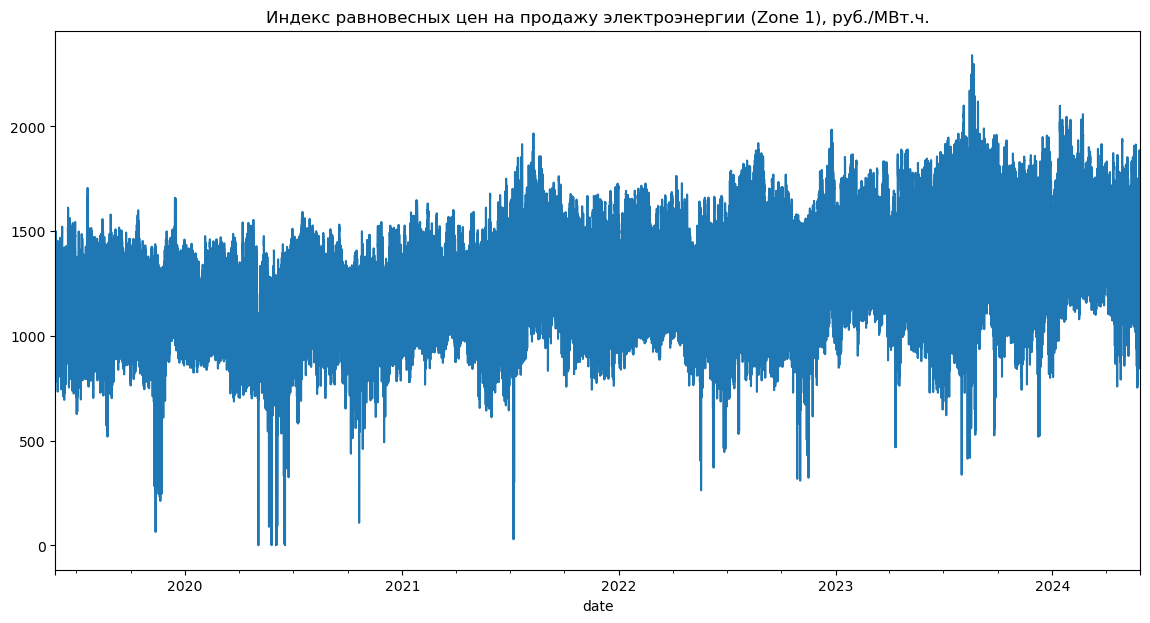

In [21]:
plt.figure(figsize = (14, 7))
df_zone_1['supplier_price'].plot()
plt.title('Индекс равновесных цен на продажу электроэнергии (Zone 1), руб./МВт.ч.')
plt.show()

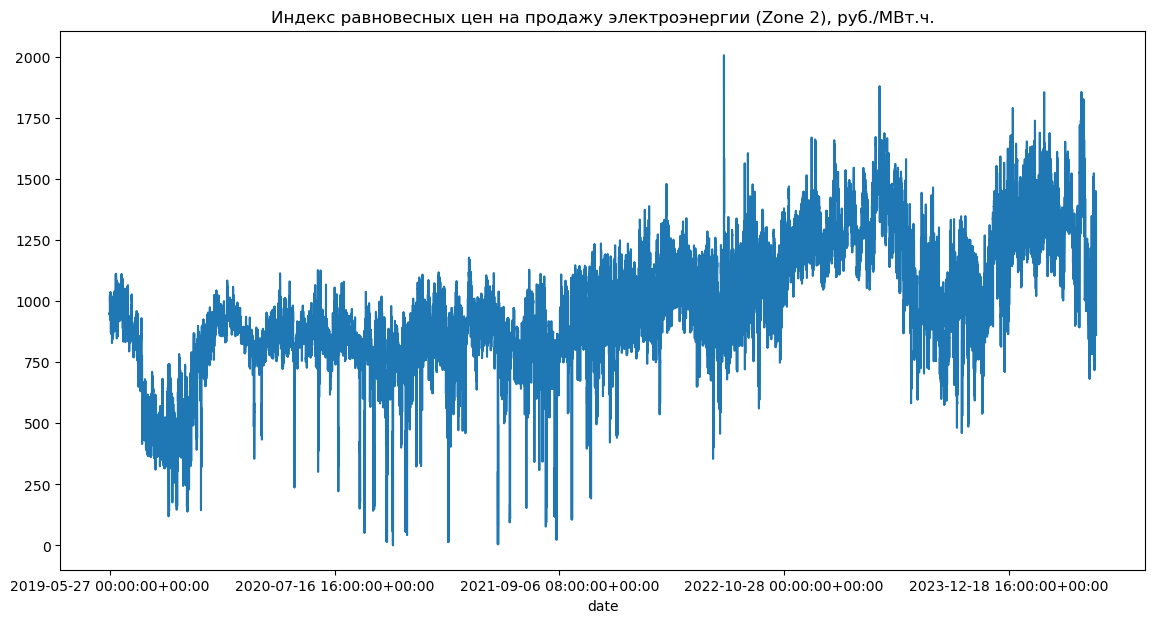

In [22]:
plt.figure(figsize = (14, 7))
df_zone_2['supplier_price'].plot()
plt.title('Индекс равновесных цен на продажу электроэнергии (Zone 2), руб./МВт.ч.')
plt.show()

## Price distributions

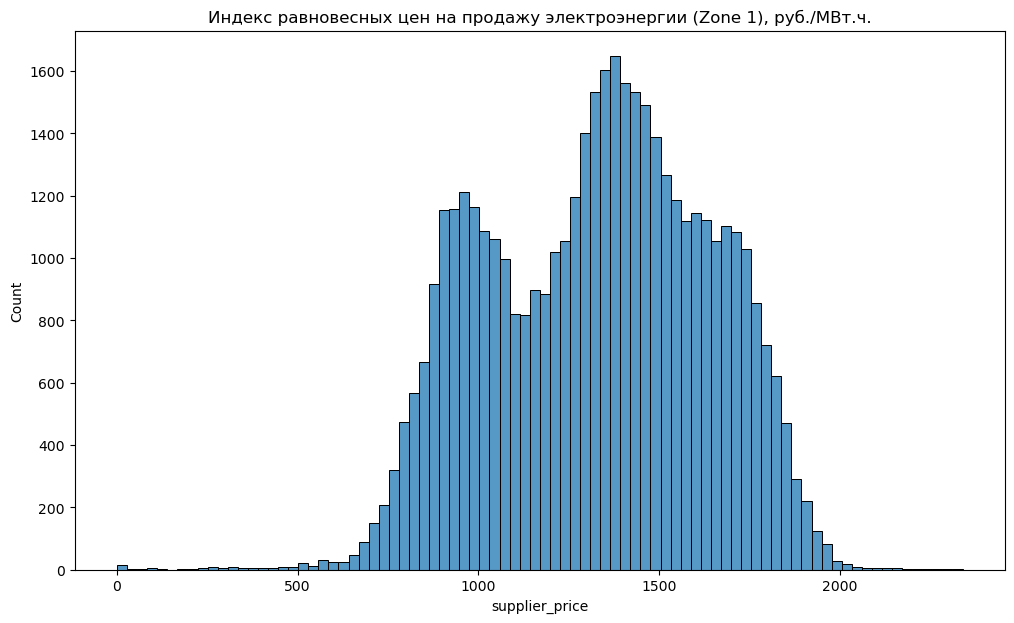

In [23]:
plt.figure(figsize = (12, 7))
plt.title('Индекс равновесных цен на продажу электроэнергии (Zone 1), руб./МВт.ч.')
sb.histplot(df_zone_1['supplier_price'])
plt.show()

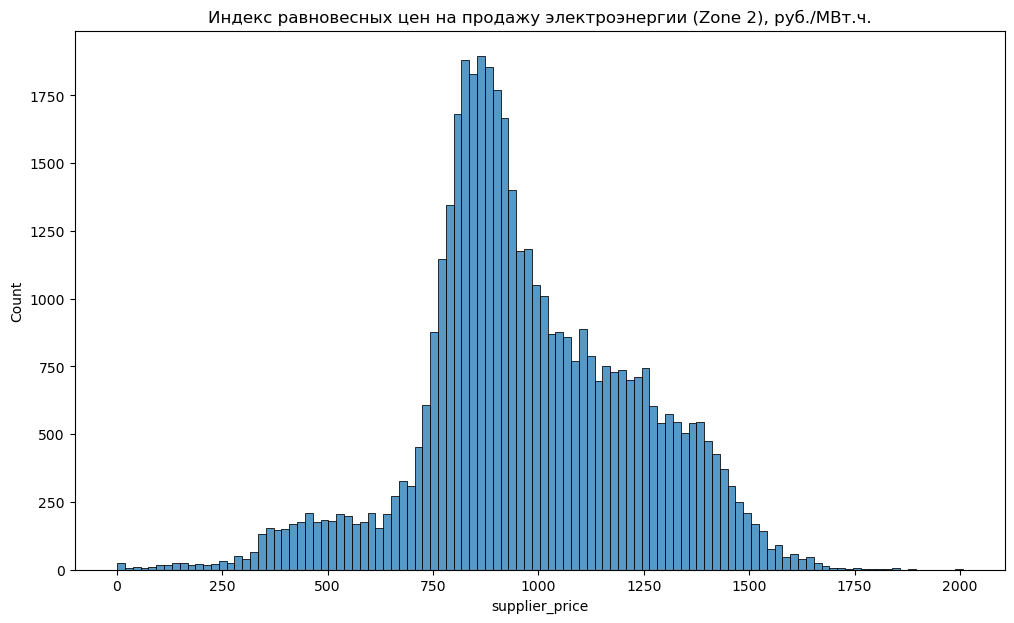

In [24]:
plt.figure(figsize = (12, 7))
plt.title('Индекс равновесных цен на продажу электроэнергии (Zone 2), руб./МВт.ч.')
sb.histplot(df_zone_2['supplier_price'])
plt.show()

## Statistical tests for normality of distribution

In [25]:
from scipy import stats as st
import statsmodels.api as sm

def run_tests_for_normality(data, alpha = 0.05):
    statistic, p_value = st.normaltest(data)
    if p_value > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f"D'Agostino & Pearson: {result:>11s}")
    print(statistic)
    print()
    
    statistic, pvalue = st.jarque_bera(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Jarque-Bera: {result:>20s}')
    print(statistic)
    print()

    ksstat, pvalue = sm.stats.diagnostic.kstest_normal(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Kolmogorov-Smirnov: {result:>13s}')
    print(ksstat)
    print()

    ksstat, pvalue = sm.stats.diagnostic.lilliefors(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Lilliefors: {result:>21s}')
    print(ksstat)
    print()

    statistic, pvalue = st.shapiro(data)
    if pvalue > alpha:
        result = 'Normal'
    else:
        result = 'NOT Normal'
    print(f'Shapiro-Wilk: {result:>19s}')
    print(statistic)
    print()

    result = st.anderson(data)
    idx = np.where(result.significance_level == alpha * 100)
    if result.statistic < result.critical_values[idx]:
        verdict = 'Normal'
    else:
        verdict = 'NOT Normal'
    print(f'Anderson–Darling: {verdict:>15s}')
    print(result.statistic)
    print()
    
def show_probability_plot(data):
    st.probplot(data, dist = 'norm', plot = plt)
    plt.show()
    
def show_quantile_quantile_plot(data):
    sm.qqplot(data, line = '45')
    plt.show()

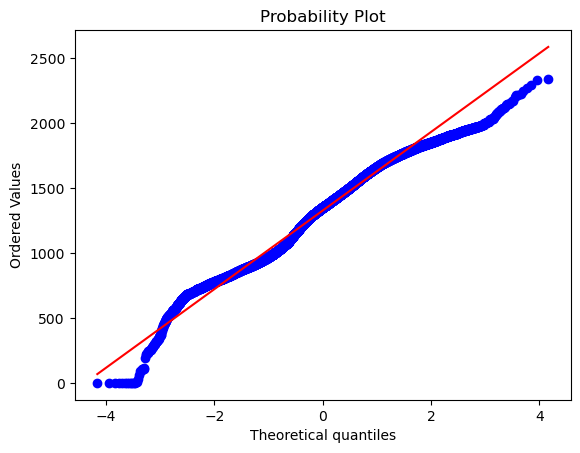

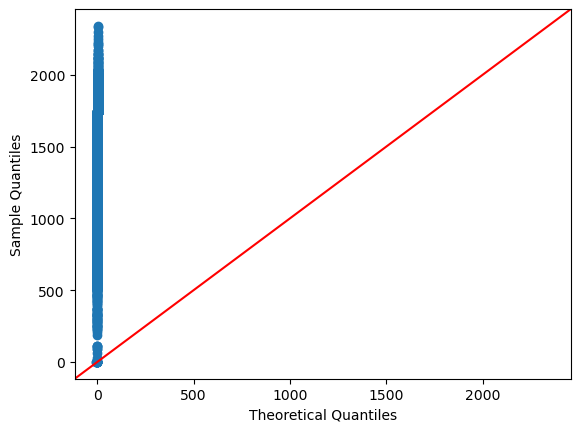

D'Agostino & Pearson:  NOT Normal
1981.2218917351206

Jarque-Bera:           NOT Normal
960.8596086375718

Kolmogorov-Smirnov:    NOT Normal
0.05015007835634011

Lilliefors:            NOT Normal
0.05015007835634011

Shapiro-Wilk:          NOT Normal
0.9825155138969421

Anderson–Darling:      NOT Normal
224.26699419884244



In [26]:
show_probability_plot(df_zone_1['supplier_price'])
show_quantile_quantile_plot(df_zone_1['supplier_price'])
run_tests_for_normality(df_zone_1['supplier_price'])

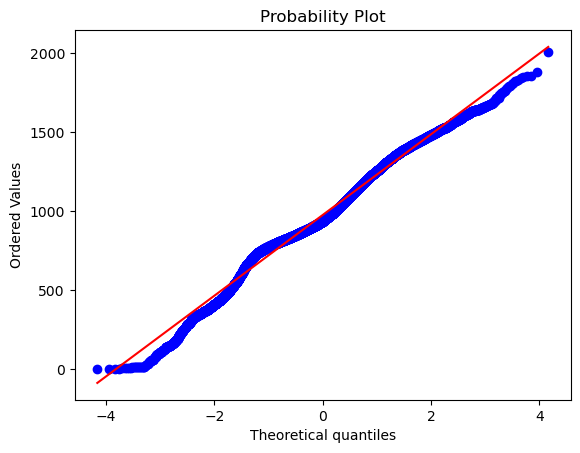

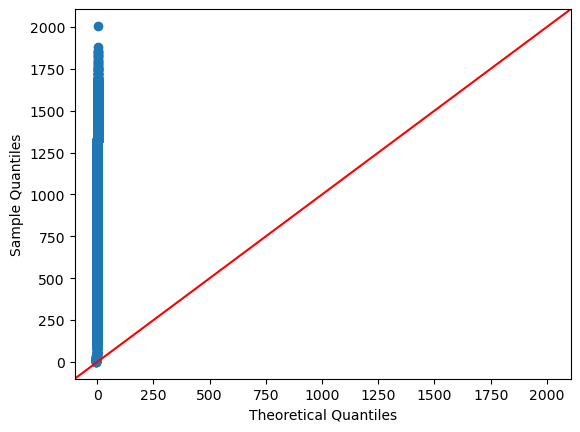

D'Agostino & Pearson:  NOT Normal
132.41352354071472

Jarque-Bera:           NOT Normal
169.63672190328668

Kolmogorov-Smirnov:    NOT Normal
0.061964345409667804

Lilliefors:            NOT Normal
0.061964345409667804

Shapiro-Wilk:          NOT Normal
0.9839980006217957

Anderson–Darling:      NOT Normal
299.56824790379324



In [27]:
show_probability_plot(df_zone_2['supplier_price'])
show_quantile_quantile_plot(df_zone_2['supplier_price'])
run_tests_for_normality(df_zone_2['supplier_price'])

## Outliers check

In [30]:
from scipy import stats
import numpy as np

def remove_outliers(df, column):
    q_low = df[column].quantile(0.05)
    q_high = df[column].quantile(0.95)
    return df[(df[column] < q_high) & (df[column] > q_low)]

def remove_outliers_z_score(df, column):
    result = df.copy()
    result['z_score'] = stats.zscore(df[column])
    result = result.loc[result['z_score'].abs() <= 3]
    return result

In [31]:
def check_outliers(df, column):
    df1 = remove_outliers(df, 'supplier_price')
    df2 = remove_outliers_z_score(df, 'supplier_price')
    print(f'Outliers count (5th and 95th quantiles): {len(df) - len(df1)} ({(len(df) - len(df1)) * 100.0 / len(df)}%)')
    print(f'Outliers count (Z-score): {len(df) - len(df2)} ({(len(df) - len(df2)) * 100.0 / len(df)}%)')

print('Zone 1:')
check_outliers(df_zone_1, 'supplier_price')
print()
print('Zone 2:')
check_outliers(df_zone_2, 'supplier_price')

Zone 1:
Outliers count (5th and 95th quantiles): 4389 (10.00410284463895%)
Outliers count (Z-score): 70 (0.15955506929248722%)

Zone 2:
Outliers count (5th and 95th quantiles): 4388 (10.0018234865062%)
Outliers count (Z-score): 190 (0.43307804522246535%)


In [32]:
df_zone_1[(df_zone_1['supplier_price'] < 10)]

,year,quarter,month,week_of_year,day_of_year,day_of_week,day,hour,supplier_price
date,,,,,,,,,
2020-05-03 07:00:00+00:00,2020,2,5,18,124,6,3,7,0.41
2020-05-25 02:00:00+00:00,2020,2,5,22,146,0,25,2,2.12
2020-05-25 03:00:00+00:00,2020,2,5,22,146,0,25,3,1.79
2020-05-25 04:00:00+00:00,2020,2,5,22,146,0,25,4,1.82
2020-05-26 02:00:00+00:00,2020,2,5,22,147,1,26,2,4.69
2020-05-26 03:00:00+00:00,2020,2,5,22,147,1,26,3,2.44
2020-05-26 04:00:00+00:00,2020,2,5,22,147,1,26,4,2.85
2020-06-02 02:00:00+00:00,2020,2,6,23,154,1,2,2,0.82
2020-06-02 03:00:00+00:00,2020,2,6,23,154,1,2,3,0.75


In [33]:
df_zone_2[(df_zone_2['supplier_price'] < 10)]

,year,quarter,month,week_of_year,day_of_year,day_of_week,day,hour,supplier_price
date,,,,,,,,,
2020-11-01 20:00:00+00:00,2020,4,11,44,306,6,1,20,0.45
2020-11-01 21:00:00+00:00,2020,4,11,44,306,6,1,21,0.99
2020-11-01 22:00:00+00:00,2020,4,11,44,306,6,1,22,0.46
2020-11-01 23:00:00+00:00,2020,4,11,44,306,6,1,23,0.46
2021-05-15 01:00:00+00:00,2021,2,5,19,135,5,15,1,6.00
2021-05-15 02:00:00+00:00,2021,2,5,19,135,5,15,2,4.51
2021-05-15 20:00:00+00:00,2021,2,5,19,135,5,15,20,4.43
2021-05-15 22:00:00+00:00,2021,2,5,19,135,5,15,22,4.56
2021-05-15 23:00:00+00:00,2021,2,5,19,135,5,15,23,6.90


## Difference between zones' prices

In [36]:
result = np.array(df_zone_1['supplier_price'].tolist()) - np.array(df_zone_2['supplier_price'].tolist())
result

array([178.31,  90.98,  22.01, ..., 634.62, 448.26, 368.31])

In [37]:
pd.DataFrame(result).describe()

,0
count,43872.000000
mean,352.902159
std,288.123976
min,-871.830000
25%,150.350000
50%,362.160000
75%,530.670000
max,1571.860000


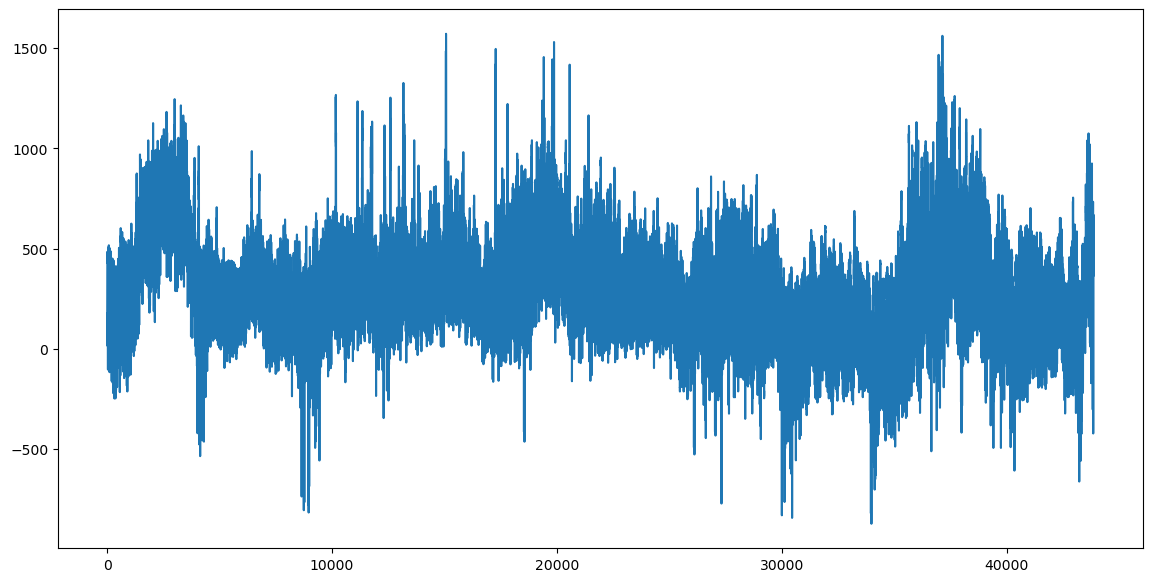

In [39]:
plt.figure(figsize = (14, 7))
plt.plot(result)
plt.show()

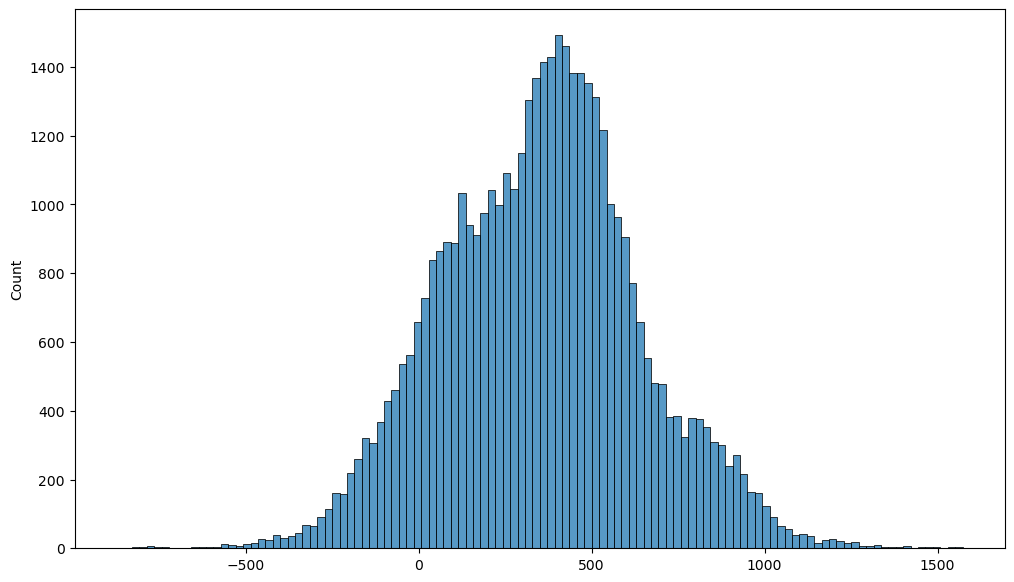

In [40]:
plt.figure(figsize = (12, 7))
sb.histplot(result)
plt.show()

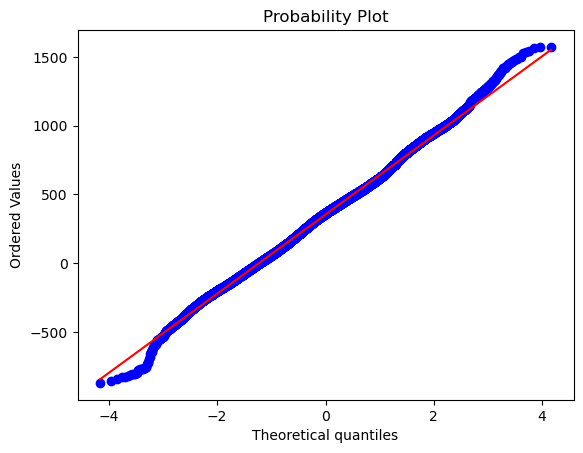

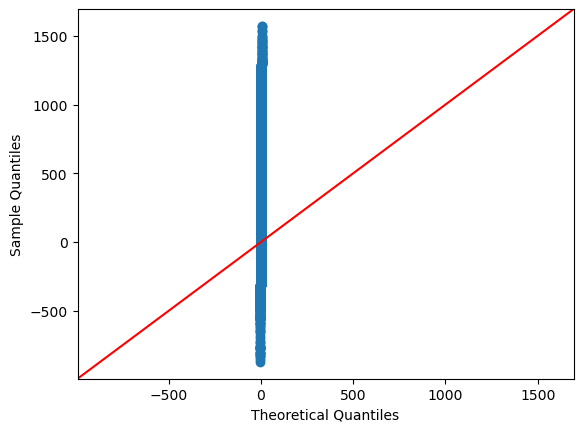

D'Agostino & Pearson:  NOT Normal
95.5539676540244

Jarque-Bera:           NOT Normal
106.66131420923897

Kolmogorov-Smirnov:    NOT Normal
0.020415191330166893

Lilliefors:            NOT Normal
0.020415191330166893

Shapiro-Wilk:          NOT Normal
0.9980186820030212

Anderson–Darling:      NOT Normal
28.541917917638784



In [41]:
show_probability_plot(result)
show_quantile_quantile_plot(result)
run_tests_for_normality(result)

## Pair plot

In [71]:
'''df = pd.DataFrame(
    [df_zone_1['supplier_price'], df_zone_2['supplier_price']],
    index = df_zone_1.index,
    columns = ['supplier_price_zone_1', 'supplier_price_zone_2']
)    
'''
df = df_zone_1[['supplier_price']].copy()
df.rename(columns = {'supplier_price': 'supplier_price_zone_1'}, inplace = True)
df['supplier_price_zone_2'] = df_zone_2['supplier_price']
df

,supplier_price_zone_1,supplier_price_zone_2
date,,
2019-05-27 00:00:00+00:00,1128.21,949.90
2019-05-27 01:00:00+00:00,1033.18,942.20
2019-05-27 02:00:00+00:00,974.15,952.14
2019-05-27 03:00:00+00:00,961.04,944.93
2019-05-27 04:00:00+00:00,990.31,966.00
...,...,...
2024-05-27 19:00:00+00:00,1661.53,1227.36
2024-05-27 20:00:00+00:00,1639.18,1010.99
2024-05-27 21:00:00+00:00,1570.74,936.12


<Figure size 2500x2500 with 0 Axes>

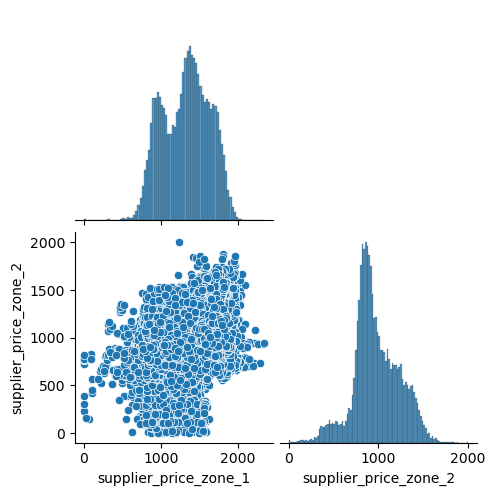

In [72]:
def show_pair_plot(df, figure_size = (15, 15), target_name = None):
    plt.figure(figsize = figure_size)
    df_without_object_columns = df.select_dtypes(exclude = ['object'])
    if target_name != None:
        sb.pairplot(df_without_object_columns, corner = True, palette = 'tab10', hue = target_name)
    else:
        sb.pairplot(df_without_object_columns, corner = True)
    plt.show()

show_pair_plot(df, figure_size = (25, 25))

## Correlation map

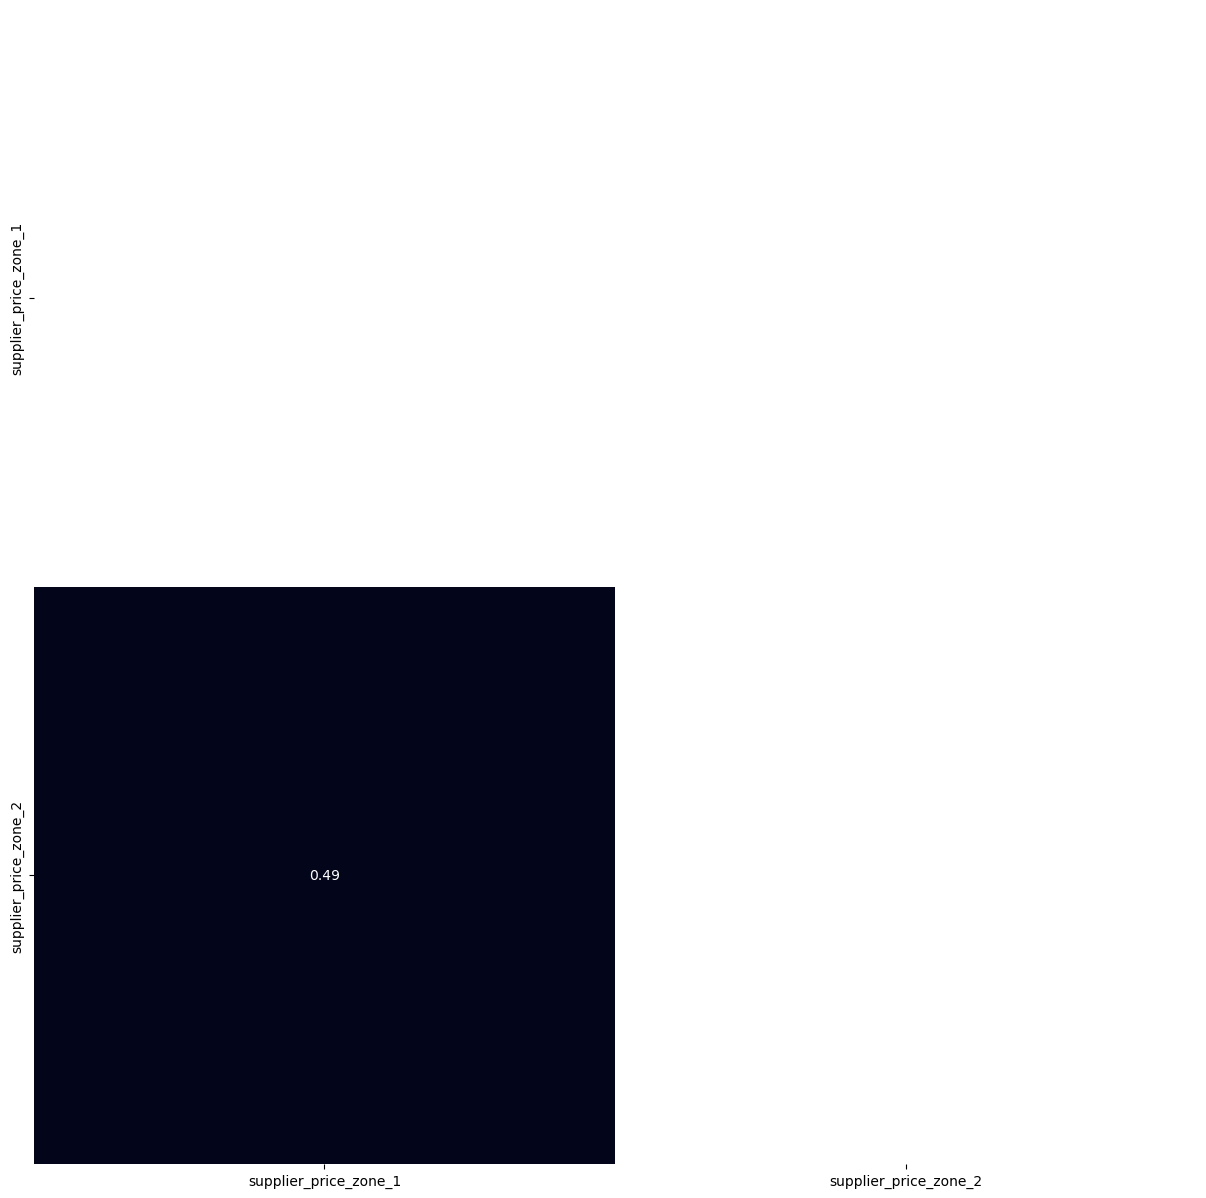

In [73]:
import numpy as np

def show_correlation_map(df, figure_size = (15, 15)):
    plt.figure(figsize = figure_size)
    corr_matrix = df.select_dtypes(exclude = ['object']).corr()
    lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k = -1).astype(np.bool_))
    sb.heatmap(
        lower,
        annot = True,
        fmt = '.2f',
        cbar = False)
    plt.show()

show_correlation_map(df)